# House price prediction using linear model
- link:https://www.kaggle.com/datasets/anthonypino/melbourne-housing-market
  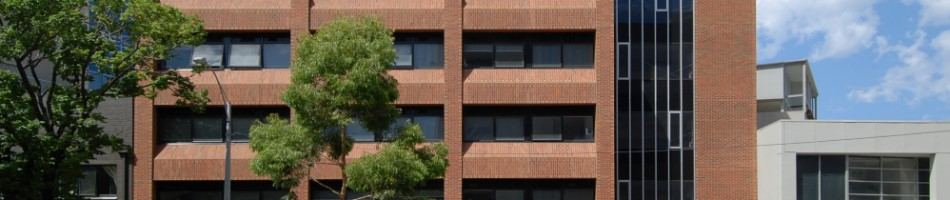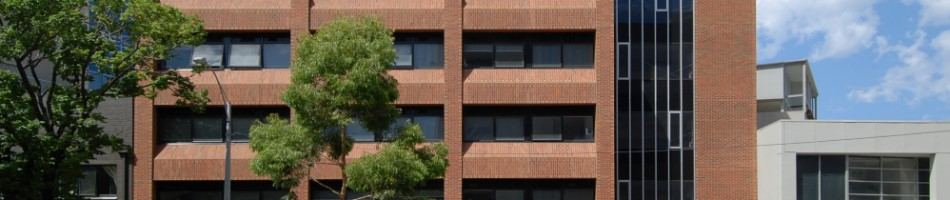

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("Melbourne_housing_FULL.csv",sep=",",encoding="latin1")

In [3]:
pd.set_option("display.max_columns",None)
df



,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,2.0,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.80140,144.99580,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,3.0,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.81140,145.01160,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,13 Burns St,4,h,1480000.0,PI,Jas,24/02/2018,6.3,3013.0,4.0,1.0,3.0,593.0,NaN,NaN,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0
34853,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,24/02/2018,6.3,3013.0,2.0,2.0,1.0,98.0,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0
34854,Yarraville,147A Severn St,2,t,705000.0,S,Jas,24/02/2018,6.3,3013.0,2.0,1.0,2.0,220.0,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0
34855,Yarraville,12/37 Stephen St,3,h,1140000.0,SP,hockingstuart,24/02/2018,6.3,3013.0,NaN,NaN,NaN,NaN,NaN,NaN,Maribyrnong City Council,NaN,NaN,Western Metropolitan,6543.0


# remove columns and rows

In [4]:
df.nunique()

Suburb             351
Address          34009
Rooms               12
Type                 3
Price             2871
Method               9
SellerG            388
Date                78
Distance           215
Postcode           211
Bedroom2            15
Bathroom            11
Car                 15
Landsize          1684
BuildingArea       740
YearBuilt          160
CouncilArea         33
Lattitude        13402
Longtitude       14524
Regionname           8
Propertycount      342
dtype: int64

In [5]:
# first know what object columns that have high cardinality to drop it
high_cardinality_cols = [col for col in df.select_dtypes(include='object').columns if df[col].nunique() > 50]
print(high_cardinality_cols)


['Suburb', 'Address', 'SellerG', 'Date']


In [6]:
# drop the columns and the reason we did not drop because it could be importatn like the high season tha happen alot of selling
df.drop("Suburb",axis=1,inplace=True)
df.drop("Address",axis=1,inplace=True)
df.drop("SellerG",axis=1,inplace=True)


In [7]:
correlation_matrix = df.corr(numeric_only= True)
correlation_with_target = correlation_matrix['Price'].sort_values(ascending=False)
print(correlation_with_target)

Price            1.000000
Rooms            0.465238
Bedroom2         0.430275
Bathroom         0.429878
Car              0.201803
Longtitude       0.197874
BuildingArea     0.100754
Postcode         0.044950
Landsize         0.032748
Propertycount   -0.059017
Distance        -0.211384
Lattitude       -0.215607
YearBuilt       -0.333306
Name: Price, dtype: float64


In [8]:
df.nunique()

Rooms               12
Type                 3
Price             2871
Method               9
Date                78
Distance           215
Postcode           211
Bedroom2            15
Bathroom            11
Car                 15
Landsize          1684
BuildingArea       740
YearBuilt          160
CouncilArea         33
Lattitude        13402
Longtitude       14524
Regionname           8
Propertycount      342
dtype: int64

- and for the numerical columns that have high caridnalty and low correlation for the target(price) we are going to drop
- [Postcode - Longtitude - Lattitude]

In [9]:
df.drop("Postcode",axis=1,inplace=True)
df.drop("Longtitude",axis=1,inplace=True)
df.drop("Lattitude",axis=1,inplace=True)

In [10]:
x=df.isnull().sum()/df.shape[0]
x

Rooms            0.000000
Type             0.000000
Price            0.218321
Method           0.000000
Date             0.000000
Distance         0.000029
Bedroom2         0.235735
Bathroom         0.235993
Car              0.250394
Landsize         0.338813
BuildingArea     0.605761
YearBuilt        0.553863
CouncilArea      0.000086
Regionname       0.000086
Propertycount    0.000086
dtype: float64

- we notice here that we have 2 columns that have messsing values more than 40% which is (YearBuilt-BuildingArea) so we are going to drop it
and the other will be fill it by other ideas

<Axes: >

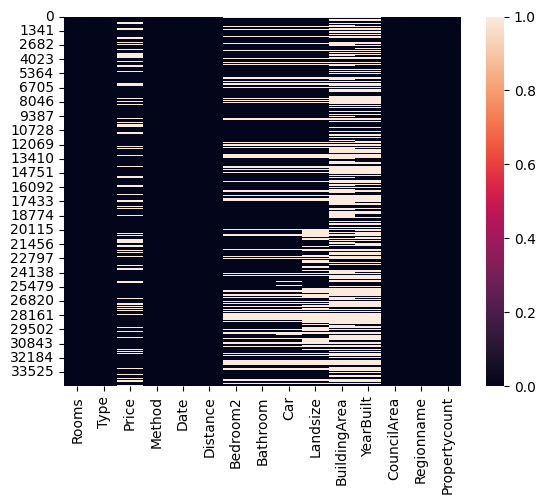

In [11]:
sns.heatmap(df.isnull())

In [12]:
# so we are going to drop the columns that have more than 40% missing values
df.drop("BuildingArea",axis=1,inplace=True)
df.drop("YearBuilt",axis=1,inplace=True)

In [13]:
df

,Rooms,Type,Price,Method,Date,Distance,Bedroom2,Bathroom,Car,Landsize,CouncilArea,Regionname,Propertycount
0,2,h,NaN,SS,3/09/2016,2.5,2.0,1.0,1.0,126.0,Yarra City Council,Northern Metropolitan,4019.0
1,2,h,1480000.0,S,3/12/2016,2.5,2.0,1.0,1.0,202.0,Yarra City Council,Northern Metropolitan,4019.0
2,2,h,1035000.0,S,4/02/2016,2.5,2.0,1.0,0.0,156.0,Yarra City Council,Northern Metropolitan,4019.0
3,3,u,NaN,VB,4/02/2016,2.5,3.0,2.0,1.0,0.0,Yarra City Council,Northern Metropolitan,4019.0
4,3,h,1465000.0,SP,4/03/2017,2.5,3.0,2.0,0.0,134.0,Yarra City Council,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,4,h,1480000.0,PI,24/02/2018,6.3,4.0,1.0,3.0,593.0,Maribyrnong City Council,Western Metropolitan,6543.0
34853,2,h,888000.0,SP,24/02/2018,6.3,2.0,2.0,1.0,98.0,Maribyrnong City Council,Western Metropolitan,6543.0
34854,2,t,705000.0,S,24/02/2018,6.3,2.0,1.0,2.0,220.0,Maribyrnong City Council,Western Metropolitan,6543.0
34855,3,h,1140000.0,SP,24/02/2018,6.3,NaN,NaN,NaN,NaN,Maribyrnong City Council,Western Metropolitan,6543.0


<Axes: >

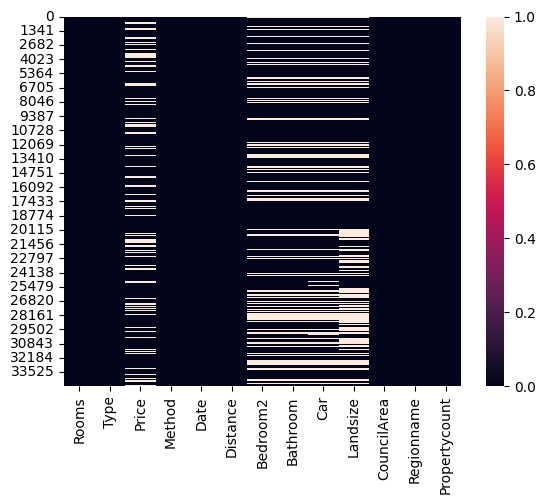

In [14]:
sns.heatmap(df.isnull())

In [15]:
df.dropna(thresh= 10, inplace= True)


<Axes: >

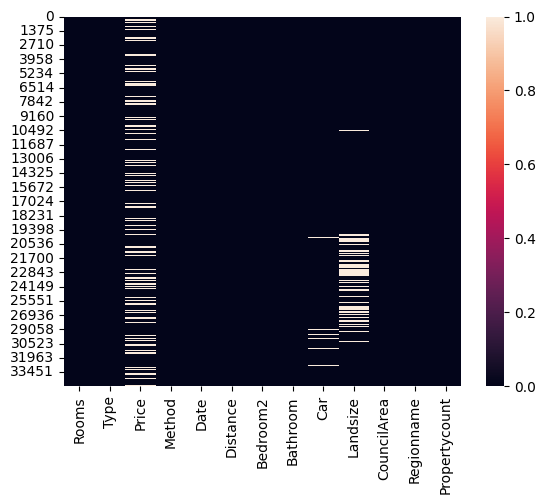

In [16]:
sns.heatmap(df.isnull())

In [17]:
df

,Rooms,Type,Price,Method,Date,Distance,Bedroom2,Bathroom,Car,Landsize,CouncilArea,Regionname,Propertycount
0,2,h,NaN,SS,3/09/2016,2.5,2.0,1.0,1.0,126.0,Yarra City Council,Northern Metropolitan,4019.0
1,2,h,1480000.0,S,3/12/2016,2.5,2.0,1.0,1.0,202.0,Yarra City Council,Northern Metropolitan,4019.0
2,2,h,1035000.0,S,4/02/2016,2.5,2.0,1.0,0.0,156.0,Yarra City Council,Northern Metropolitan,4019.0
3,3,u,NaN,VB,4/02/2016,2.5,3.0,2.0,1.0,0.0,Yarra City Council,Northern Metropolitan,4019.0
4,3,h,1465000.0,SP,4/03/2017,2.5,3.0,2.0,0.0,134.0,Yarra City Council,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
34851,3,h,1101000.0,S,24/02/2018,6.3,3.0,1.0,NaN,288.0,Maribyrnong City Council,Western Metropolitan,6543.0
34852,4,h,1480000.0,PI,24/02/2018,6.3,4.0,1.0,3.0,593.0,Maribyrnong City Council,Western Metropolitan,6543.0
34853,2,h,888000.0,SP,24/02/2018,6.3,2.0,2.0,1.0,98.0,Maribyrnong City Council,Western Metropolitan,6543.0
34854,2,t,705000.0,S,24/02/2018,6.3,2.0,1.0,2.0,220.0,Maribyrnong City Council,Western Metropolitan,6543.0


# found and fill the missing values

In [18]:
df.dtypes

Rooms              int64
Type              object
Price            float64
Method            object
Date              object
Distance         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
CouncilArea       object
Regionname        object
Propertycount    float64
dtype: object

In [19]:
df.nunique()

Rooms              12
Type                3
Price            2609
Method              9
Date               78
Distance          214
Bedroom2           15
Bathroom           11
Car                15
Landsize         1684
CouncilArea        33
Regionname          8
Propertycount     339
dtype: int64

In [20]:
df.dtypes

Rooms              int64
Type              object
Price            float64
Method            object
Date              object
Distance         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
CouncilArea       object
Regionname        object
Propertycount    float64
dtype: object

In [21]:
df

,Rooms,Type,Price,Method,Date,Distance,Bedroom2,Bathroom,Car,Landsize,CouncilArea,Regionname,Propertycount
0,2,h,NaN,SS,3/09/2016,2.5,2.0,1.0,1.0,126.0,Yarra City Council,Northern Metropolitan,4019.0
1,2,h,1480000.0,S,3/12/2016,2.5,2.0,1.0,1.0,202.0,Yarra City Council,Northern Metropolitan,4019.0
2,2,h,1035000.0,S,4/02/2016,2.5,2.0,1.0,0.0,156.0,Yarra City Council,Northern Metropolitan,4019.0
3,3,u,NaN,VB,4/02/2016,2.5,3.0,2.0,1.0,0.0,Yarra City Council,Northern Metropolitan,4019.0
4,3,h,1465000.0,SP,4/03/2017,2.5,3.0,2.0,0.0,134.0,Yarra City Council,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
34851,3,h,1101000.0,S,24/02/2018,6.3,3.0,1.0,NaN,288.0,Maribyrnong City Council,Western Metropolitan,6543.0
34852,4,h,1480000.0,PI,24/02/2018,6.3,4.0,1.0,3.0,593.0,Maribyrnong City Council,Western Metropolitan,6543.0
34853,2,h,888000.0,SP,24/02/2018,6.3,2.0,2.0,1.0,98.0,Maribyrnong City Council,Western Metropolitan,6543.0
34854,2,t,705000.0,S,24/02/2018,6.3,2.0,1.0,2.0,220.0,Maribyrnong City Council,Western Metropolitan,6543.0


<Axes: >

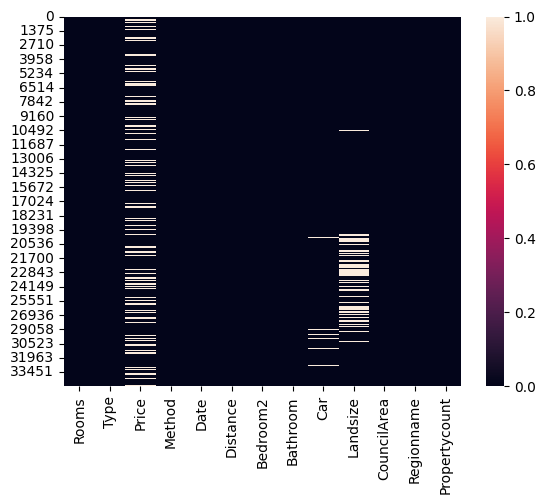

In [22]:
sns.heatmap(df.isnull())

In [23]:
df.isnull().sum()/df.shape[0]

Rooms            0.000000
Type             0.000000
Price            0.218915
Method           0.000000
Date             0.000000
Distance         0.000000
Bedroom2         0.000225
Bathroom         0.000525
Car              0.019366
Landsize         0.135072
CouncilArea      0.000000
Regionname       0.000000
Propertycount    0.000000
dtype: float64

-  the columns that have under 5% missing values we are going to use with them mean method
-  over 5% we are going to use Random Sampling Imputation 

In [24]:
df.isnull().sum()

Rooms               0
Type                0
Price            5833
Method              0
Date                0
Distance            0
Bedroom2            6
Bathroom           14
Car               516
Landsize         3599
CouncilArea         0
Regionname          0
Propertycount       0
dtype: int64

In [25]:
house = df.copy()

C:\Users\w\AppData\Local\Temp\ipykernel_8868\1801303003.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Bedroom2"])


<Axes: xlabel='Bedroom2', ylabel='Density'>

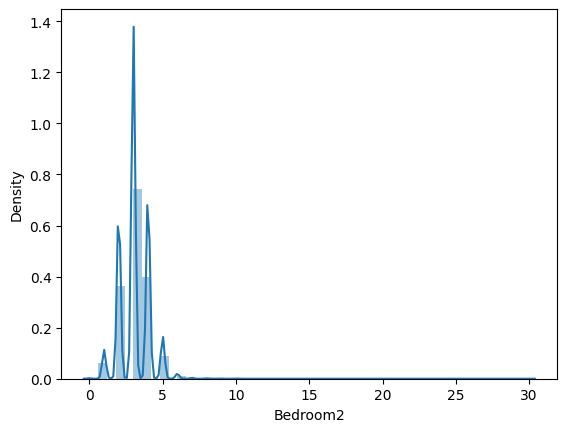

In [26]:
sns.distplot(df["Bedroom2"])

In [27]:
house['Bedroom2'].fillna(house['Bedroom2'].mean(), inplace=True)

C:\Users\w\AppData\Local\Temp\ipykernel_8868\4218196130.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(house["Bedroom2"])


<Axes: xlabel='Bedroom2', ylabel='Density'>

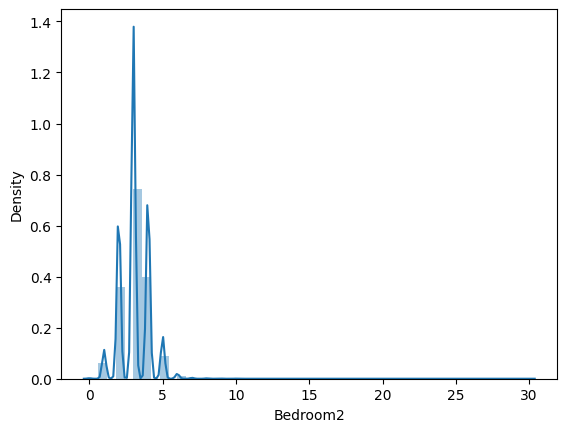

In [28]:
sns.distplot(house["Bedroom2"])

In [29]:
df['Bedroom2'].fillna(df['Bedroom2'].mean(), inplace=True)

C:\Users\w\AppData\Local\Temp\ipykernel_8868\1801303003.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Bedroom2"])


<Axes: xlabel='Bedroom2', ylabel='Density'>

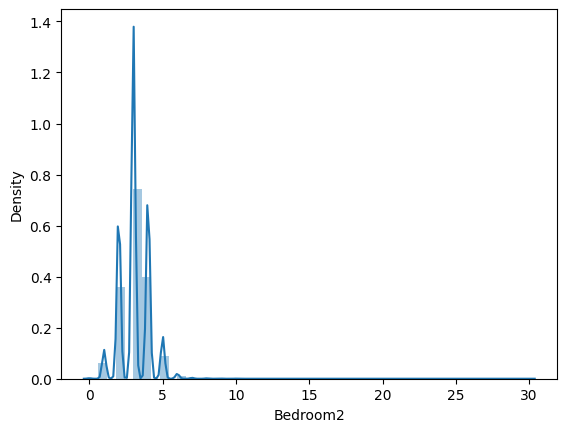

In [30]:
sns.distplot(df["Bedroom2"])

In [31]:
df.isnull().sum()/df.shape[0]

Rooms            0.000000
Type             0.000000
Price            0.218915
Method           0.000000
Date             0.000000
Distance         0.000000
Bedroom2         0.000000
Bathroom         0.000525
Car              0.019366
Landsize         0.135072
CouncilArea      0.000000
Regionname       0.000000
Propertycount    0.000000
dtype: float64

C:\Users\w\AppData\Local\Temp\ipykernel_8868\845987616.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Bathroom"])


<Axes: xlabel='Bathroom', ylabel='Density'>

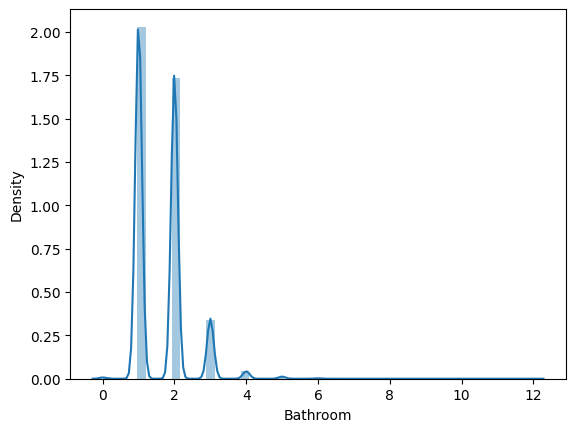

In [32]:
sns.distplot(df["Bathroom"])

C:\Users\w\AppData\Local\Temp\ipykernel_8868\4047593031.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Bathroom"])


<Axes: xlabel='Bathroom', ylabel='Density'>

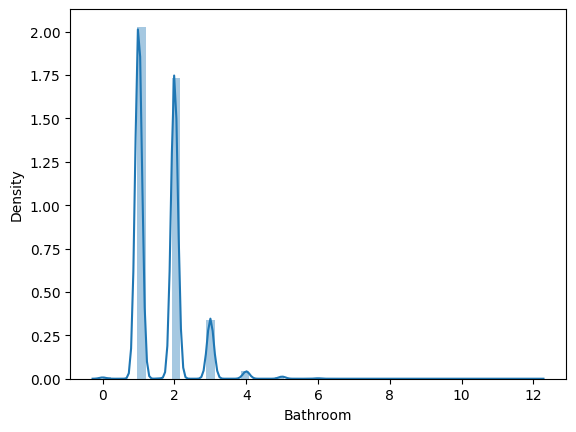

In [33]:
df['Bathroom'].fillna(df['Bathroom'].mean(), inplace=True)
sns.distplot(df["Bathroom"])

In [34]:
df.isnull().sum()/df.shape[0]

Rooms            0.000000
Type             0.000000
Price            0.218915
Method           0.000000
Date             0.000000
Distance         0.000000
Bedroom2         0.000000
Bathroom         0.000000
Car              0.019366
Landsize         0.135072
CouncilArea      0.000000
Regionname       0.000000
Propertycount    0.000000
dtype: float64

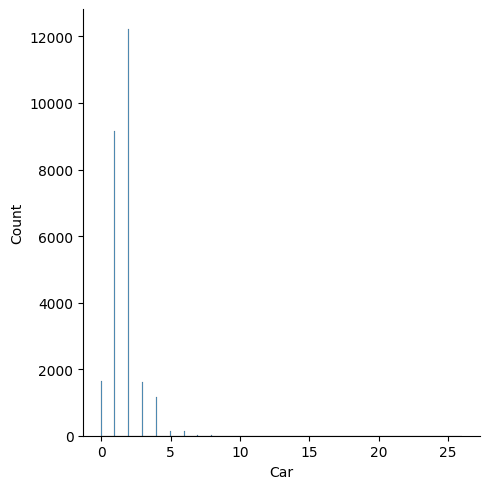

In [35]:
sns.displot(df["Car"])

C:\Users\w\AppData\Local\Temp\ipykernel_8868\382527586.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Car"])


<Axes: xlabel='Car', ylabel='Density'>

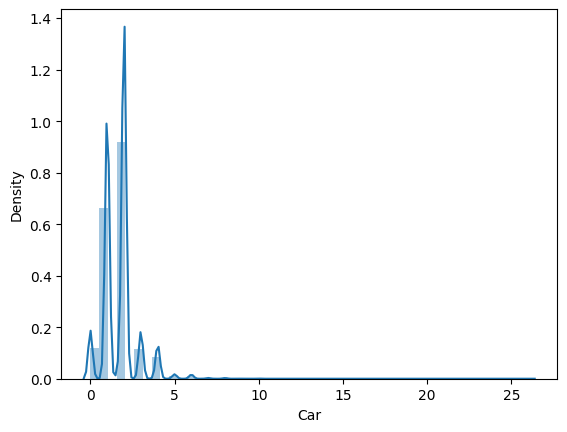

In [36]:
df['Car'].fillna(df['Car'].mean(), inplace=True)
sns.distplot(df["Car"])

In [37]:
df.isnull().sum()

Rooms               0
Type                0
Price            5833
Method              0
Date                0
Distance            0
Bedroom2            0
Bathroom            0
Car                 0
Landsize         3599
CouncilArea         0
Regionname          0
Propertycount       0
dtype: int64

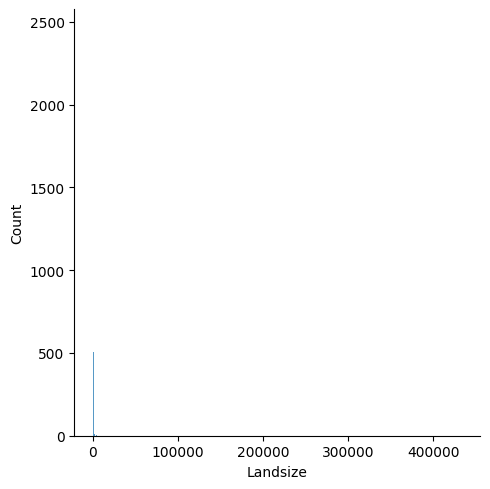

In [38]:
sns.displot(df['Landsize'])

In [39]:
df['Landsize'] = df['Landsize'].replace(0, np.nan)

In [40]:
df.isnull().sum()

Rooms               0
Type                0
Price            5833
Method              0
Date                0
Distance            0
Bedroom2            0
Bathroom            0
Car                 0
Landsize         6036
CouncilArea         0
Regionname          0
Propertycount       0
dtype: int64

In [41]:
fill_list = df['Landsize'].dropna()
df['Landsize'] = df['Landsize'].fillna(pd.Series(np.random.choice(fill_list , len(df.index))))

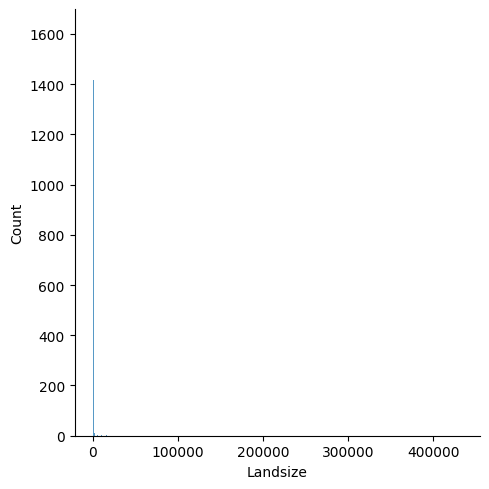

In [42]:
sns.displot(df['Landsize'])

In [43]:
df.isnull().sum()/df.shape[0]

Rooms            0.000000
Type             0.000000
Price            0.218915
Method           0.000000
Date             0.000000
Distance         0.000000
Bedroom2         0.000000
Bathroom         0.000000
Car              0.000000
Landsize         0.041321
CouncilArea      0.000000
Regionname       0.000000
Propertycount    0.000000
dtype: float64

In [44]:
df['Landsize'].fillna(df['Landsize'].mean(), inplace=True)

In [45]:
df.isnull().sum()/df.shape[0]

Rooms            0.000000
Type             0.000000
Price            0.218915
Method           0.000000
Date             0.000000
Distance         0.000000
Bedroom2         0.000000
Bathroom         0.000000
Car              0.000000
Landsize         0.000000
CouncilArea      0.000000
Regionname       0.000000
Propertycount    0.000000
dtype: float64

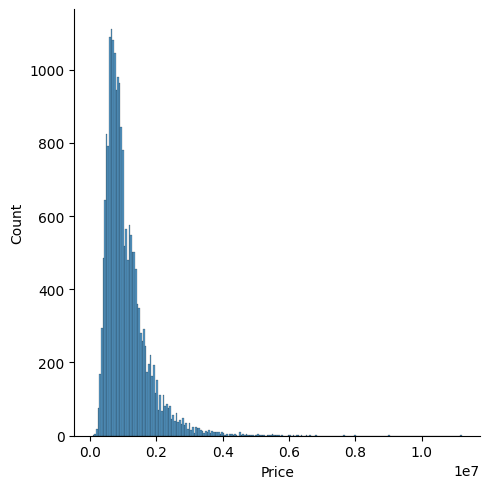

In [46]:
sns.displot(df["Price"])

In [47]:
fill_list = df['Price'].dropna()
df['Price'] = df['Price'].fillna(pd.Series(np.random.choice(fill_list , len(df.index))))

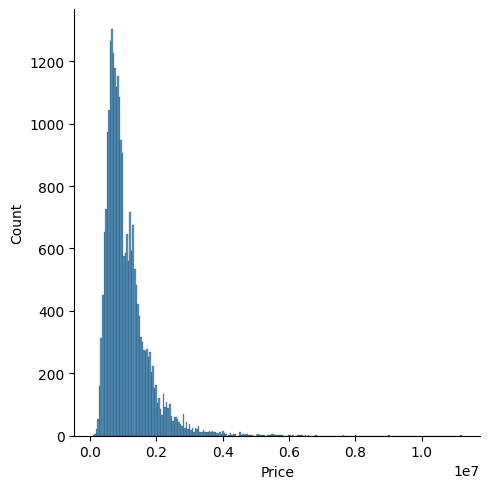

In [48]:
sns.displot(df["Price"])

In [49]:
df.isnull().sum()/df.shape[0]

Rooms            0.000000
Type             0.000000
Price            0.046575
Method           0.000000
Date             0.000000
Distance         0.000000
Bedroom2         0.000000
Bathroom         0.000000
Car              0.000000
Landsize         0.000000
CouncilArea      0.000000
Regionname       0.000000
Propertycount    0.000000
dtype: float64

C:\Users\w\AppData\Local\Temp\ipykernel_8868\523759005.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Price"])


<Axes: xlabel='Price', ylabel='Density'>

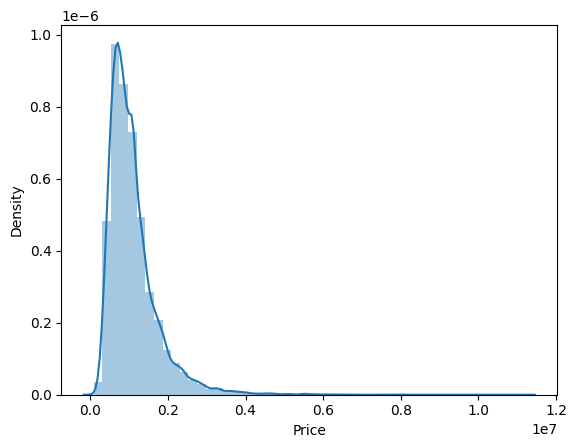

In [50]:
df['Price'].fillna(df['Price'].mean(), inplace=True)
sns.distplot(df["Price"])

In [51]:
df.isnull().sum()

Rooms            0
Type             0
Price            0
Method           0
Date             0
Distance         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
CouncilArea      0
Regionname       0
Propertycount    0
dtype: int64

In [52]:
df.head()

,Rooms,Type,Price,Method,Date,Distance,Bedroom2,Bathroom,Car,Landsize,CouncilArea,Regionname,Propertycount
0,2,h,610000.0,SS,3/09/2016,2.5,2.0,1.0,1.0,126.0,Yarra City Council,Northern Metropolitan,4019.0
1,2,h,1480000.0,S,3/12/2016,2.5,2.0,1.0,1.0,202.0,Yarra City Council,Northern Metropolitan,4019.0
2,2,h,1035000.0,S,4/02/2016,2.5,2.0,1.0,0.0,156.0,Yarra City Council,Northern Metropolitan,4019.0
3,3,u,659000.0,VB,4/02/2016,2.5,3.0,2.0,1.0,151.0,Yarra City Council,Northern Metropolitan,4019.0
4,3,h,1465000.0,SP,4/03/2017,2.5,3.0,2.0,0.0,134.0,Yarra City Council,Northern Metropolitan,4019.0


# Encoding

#### what we are going to make encoding for it will be (Type-Method-CouncilArea-Regionname)

In [53]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [54]:
Type_le=le
Method_le=le
CouncilArea_le=le
Regionname_le=le

In [55]:
df['Type'] = Type_le.fit_transform(df['Type'])
df['Regionname'] = Regionname_le.fit_transform(df['Regionname'])
df['CouncilArea'] = CouncilArea_le.fit_transform(df['CouncilArea'])
df['Method'] = Method_le.fit_transform(df['Method'])

In [56]:
df[["Type","Method",'Regionname','CouncilArea']].nunique()

Type            3
Method          9
Regionname      8
CouncilArea    33
dtype: int64

In [57]:
df

,Rooms,Type,Price,Method,Date,Distance,Bedroom2,Bathroom,Car,Landsize,CouncilArea,Regionname,Propertycount
0,2,0,610000.0,6,3/09/2016,2.5,2.0,1.0,1.000000,126.0,31,2,4019.0
1,2,0,1480000.0,2,3/12/2016,2.5,2.0,1.0,1.000000,202.0,31,2,4019.0
2,2,0,1035000.0,2,4/02/2016,2.5,2.0,1.0,0.000000,156.0,31,2,4019.0
3,3,2,659000.0,7,4/02/2016,2.5,3.0,2.0,1.000000,151.0,31,2,4019.0
4,3,0,1465000.0,5,4/03/2017,2.5,3.0,2.0,0.000000,134.0,31,2,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
34851,3,0,1101000.0,2,24/02/2018,6.3,3.0,1.0,1.728845,288.0,16,6,6543.0
34852,4,0,1480000.0,0,24/02/2018,6.3,4.0,1.0,3.000000,593.0,16,6,6543.0
34853,2,0,888000.0,5,24/02/2018,6.3,2.0,2.0,1.000000,98.0,16,6,6543.0
34854,2,1,705000.0,2,24/02/2018,6.3,2.0,1.0,2.000000,220.0,16,6,6543.0


In [58]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

In [59]:
df.dtypes

Rooms                     int64
Type                      int32
Price                   float64
Method                    int32
Date             datetime64[ns]
Distance                float64
Bedroom2                float64
Bathroom                float64
Car                     float64
Landsize                float64
CouncilArea               int32
Regionname                int32
Propertycount           float64
dtype: object

In [60]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df.drop('Date', axis=1, inplace=True)

In [61]:
df

,Rooms,Type,Price,Method,Distance,Bedroom2,Bathroom,Car,Landsize,CouncilArea,Regionname,Propertycount,Year,Month,Day
0,2,0,610000.0,6,2.5,2.0,1.0,1.000000,126.0,31,2,4019.0,2016,9,3
1,2,0,1480000.0,2,2.5,2.0,1.0,1.000000,202.0,31,2,4019.0,2016,12,3
2,2,0,1035000.0,2,2.5,2.0,1.0,0.000000,156.0,31,2,4019.0,2016,2,4
3,3,2,659000.0,7,2.5,3.0,2.0,1.000000,151.0,31,2,4019.0,2016,2,4
4,3,0,1465000.0,5,2.5,3.0,2.0,0.000000,134.0,31,2,4019.0,2017,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34851,3,0,1101000.0,2,6.3,3.0,1.0,1.728845,288.0,16,6,6543.0,2018,2,24
34852,4,0,1480000.0,0,6.3,4.0,1.0,3.000000,593.0,16,6,6543.0,2018,2,24
34853,2,0,888000.0,5,6.3,2.0,2.0,1.000000,98.0,16,6,6543.0,2018,2,24
34854,2,1,705000.0,2,6.3,2.0,1.0,2.000000,220.0,16,6,6543.0,2018,2,24


In [62]:
df.dtypes

Rooms              int64
Type               int32
Price            float64
Method             int32
Distance         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
CouncilArea        int32
Regionname         int32
Propertycount    float64
Year               int32
Month              int32
Day                int32
dtype: object

# outliers

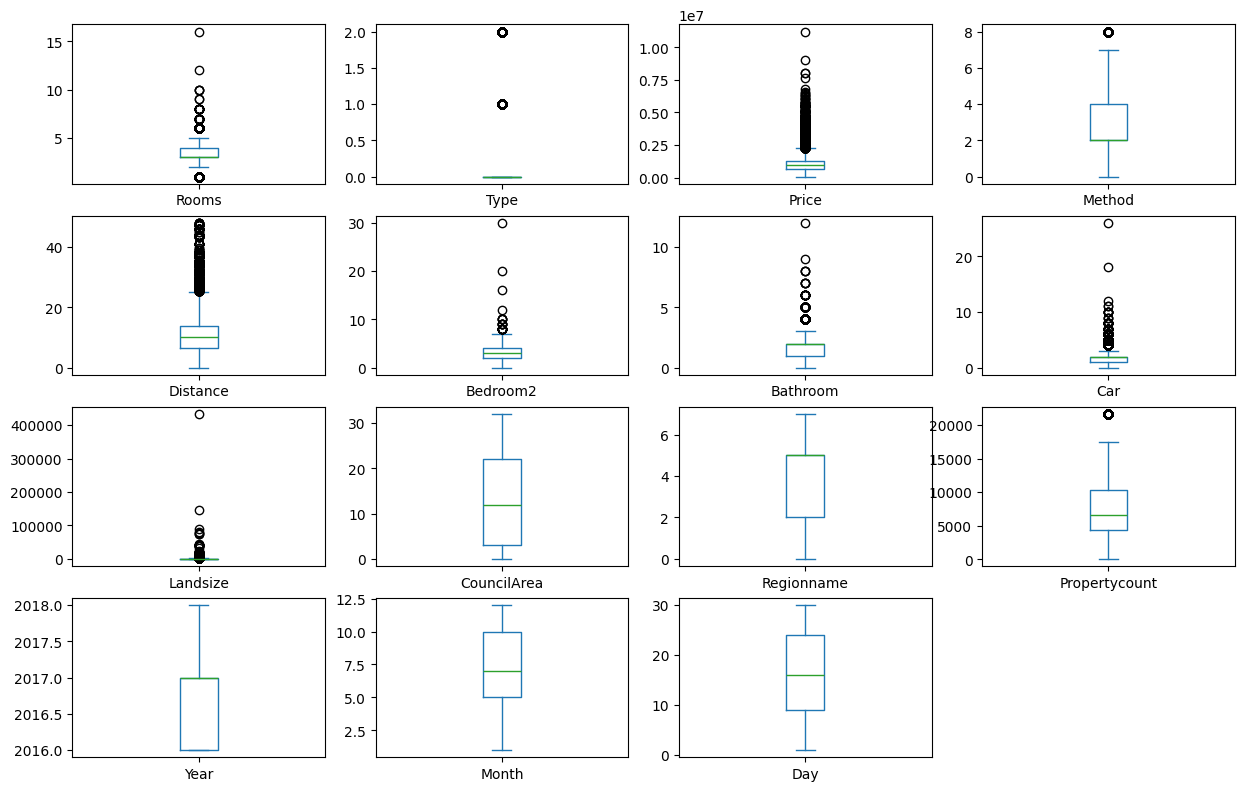

In [66]:
df.plot(kind="box", subplots=True, figsize=(15, 12), layout=(5, 4))
plt.show()

- so we have outliers in ( rooms- price-  bedroom2-barthrom-car-landsize-property count)

In [89]:
df.nunique()

Rooms              12
Type                3
Price            2610
Method              9
Distance          214
Bedroom2           16
Bathroom           12
Car                16
Landsize         1684
CouncilArea        33
Regionname          8
Propertycount     339
Year                3
Month              12
Day                28
dtype: int64

<Axes: ylabel='Rooms'>

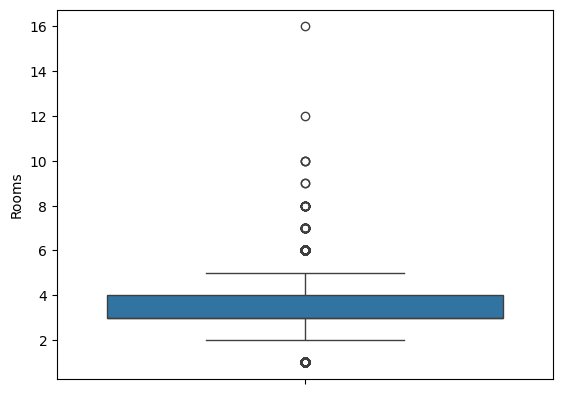

In [91]:
sns.boxplot(df["Rooms"])

In [93]:
# Calculate IQR
Q1 = df['Rooms'].quantile(0.25)
Q3 = df['Rooms'].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
outliers = df[(df['Rooms'] < (Q1 - 1.5 * IQR)) | (df['Rooms'] > (Q3 + 1.5 * IQR))]


# Handle outliers by capping them
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df['Rooms'] = np.where(df['Rooms'] < lower_bound, lower_bound, df['Rooms'])
df['Rooms'] = np.where(df['Rooms'] > upper_bound, upper_bound, df['Rooms'])


<Axes: ylabel='Rooms'>

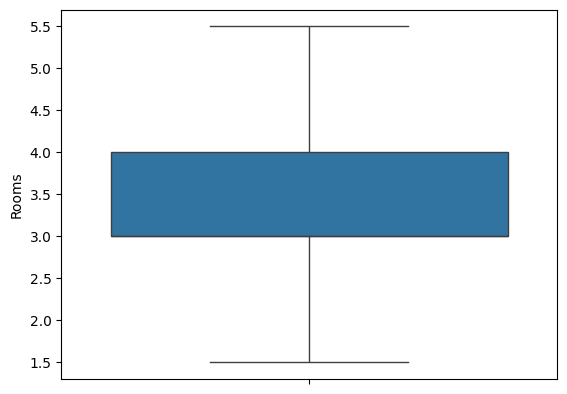

In [94]:
sns.boxplot(df["Rooms"])

<Axes: ylabel='Price'>

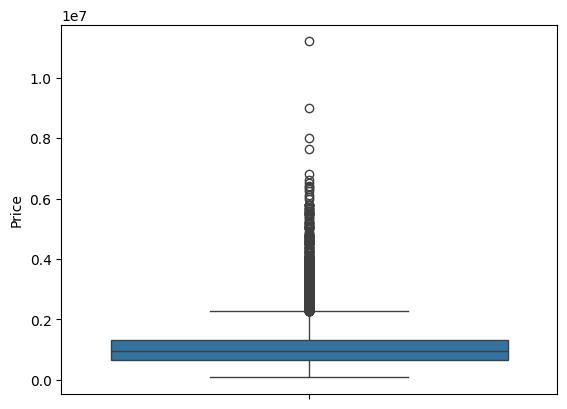

In [95]:
sns.boxplot(df["Price"])

In [98]:
df[["Price"]].describe()

,Price
count,2.664500e+04
mean,1.090451e+06
std,6.357935e+05
min,8.500000e+04
25%,6.700000e+05
50%,9.400000e+05
75%,1.310000e+06
max,1.120000e+07


In [108]:
print ("outliers :" , df[(df['Price'] > 7600000)].count())

outliers : Rooms            4
Type             4
Price            4
Method           4
Distance         4
Bedroom2         4
Bathroom         4
Car              4
Landsize         4
CouncilArea      4
Regionname       4
Propertycount    4
Year             4
Month            4
Day              4
dtype: int64


In [110]:
df = df[df['Price'] < 7600000]

<Axes: ylabel='Price'>

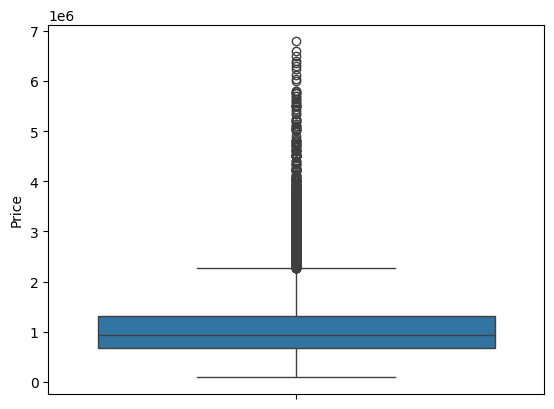

In [111]:
sns.boxplot(df["Price"])

<Axes: ylabel='Bedroom2'>

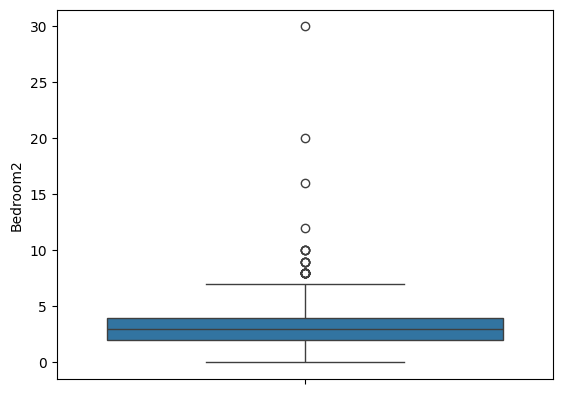

In [117]:
sns.boxplot(df["Bedroom2"])

In [122]:
print ("outliers :" , df[(df['Bedroom2'] > 15)].count())

outliers : Rooms            3
Type             3
Price            3
Method           3
Distance         3
Bedroom2         3
Bathroom         3
Car              3
Landsize         3
CouncilArea      3
Regionname       3
Propertycount    3
Year             3
Month            3
Day              3
dtype: int64


In [125]:
df = df[df['Bedroom2'] < 15]


<Axes: ylabel='Bedroom2'>

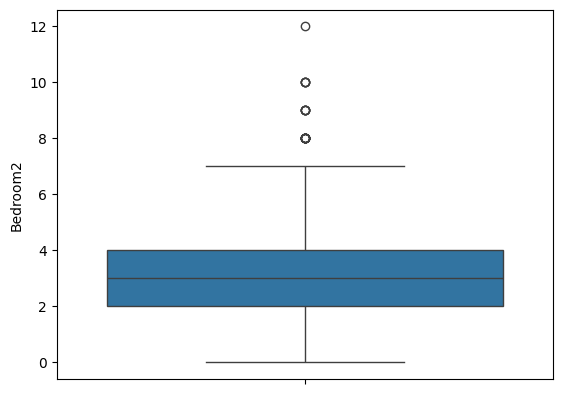

In [126]:
sns.boxplot(df["Bedroom2"])

<Axes: ylabel='Bathroom'>

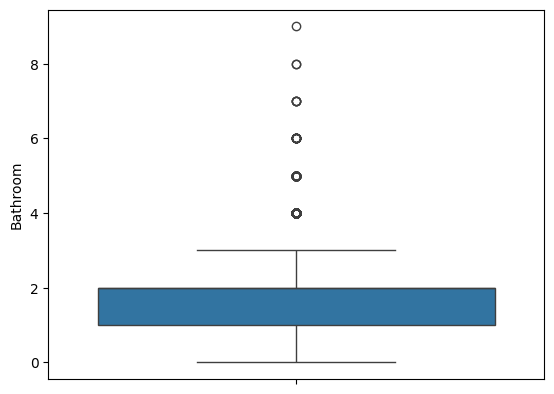

In [127]:
sns.boxplot(df["Bathroom"])

In [130]:
print ("outliers :" , df[(df['Bathroom'] > 6)].count())

outliers : Rooms            7
Type             7
Price            7
Method           7
Distance         7
Bedroom2         7
Bathroom         7
Car              7
Landsize         7
CouncilArea      7
Regionname       7
Propertycount    7
Year             7
Month            7
Day              7
dtype: int64


In [131]:
df = df[df['Bathroom'] < 6]


<Axes: ylabel='Bathroom'>

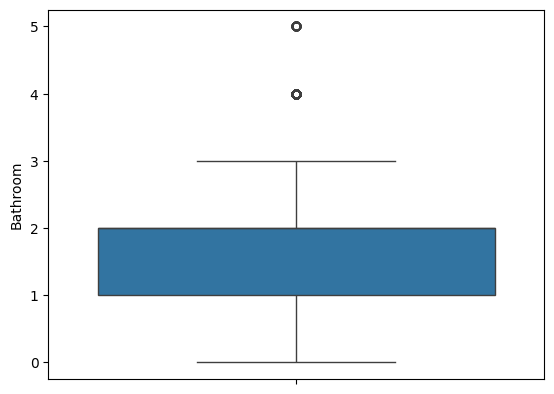

In [132]:
sns.boxplot(df["Bathroom"])

<Axes: ylabel='Car'>

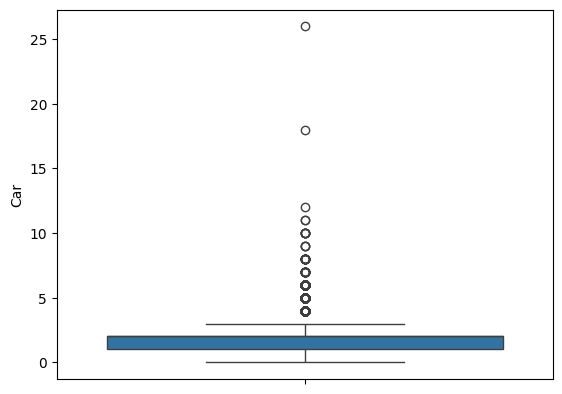

In [133]:
sns.boxplot(df["Car"])

In [134]:
print ("outliers :" , df[(df['Car'] > 15)].count())

outliers : Rooms            2
Type             2
Price            2
Method           2
Distance         2
Bedroom2         2
Bathroom         2
Car              2
Landsize         2
CouncilArea      2
Regionname       2
Propertycount    2
Year             2
Month            2
Day              2
dtype: int64


In [137]:
df = df[df['Car'] < 15]


<Axes: ylabel='Car'>

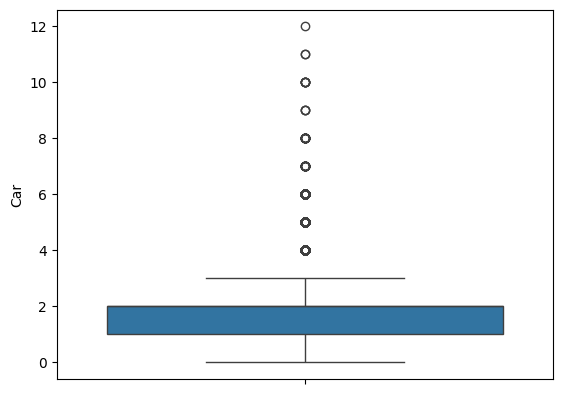

In [138]:
sns.boxplot(df["Car"])

<Axes: ylabel='Landsize'>

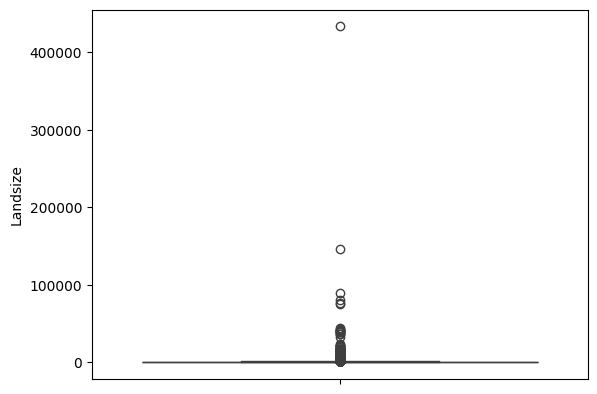

In [139]:
sns.boxplot(df["Landsize"])

In [140]:
print ("outliers :" , df[(df['Landsize'] > 100000)].count())

outliers : Rooms            2
Type             2
Price            2
Method           2
Distance         2
Bedroom2         2
Bathroom         2
Car              2
Landsize         2
CouncilArea      2
Regionname       2
Propertycount    2
Year             2
Month            2
Day              2
dtype: int64


In [141]:
df=df[df["Landsize"]<100000]

<Axes: ylabel='Landsize'>

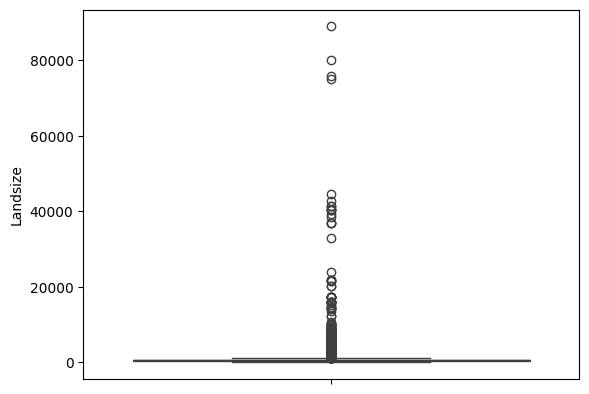

In [142]:
sns.boxplot(df["Landsize"])

In [144]:
print ("outliers :" , df[(df['Landsize'] > 57000)].count())

outliers : Rooms            4
Type             4
Price            4
Method           4
Distance         4
Bedroom2         4
Bathroom         4
Car              4
Landsize         4
CouncilArea      4
Regionname       4
Propertycount    4
Year             4
Month            4
Day              4
dtype: int64


In [145]:
df=df[df["Landsize"]<57000]

<Axes: ylabel='Landsize'>

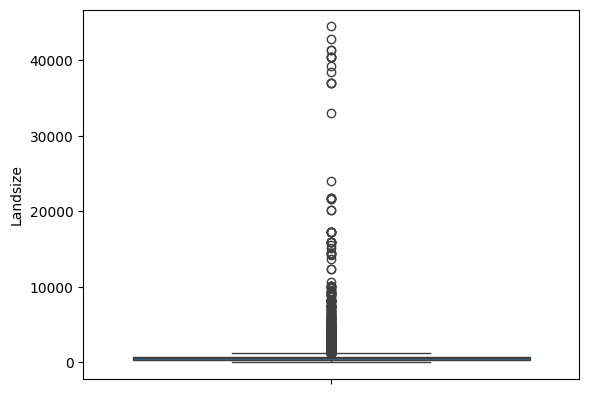

In [146]:
sns.boxplot(df["Landsize"])

<Axes: ylabel='Propertycount'>

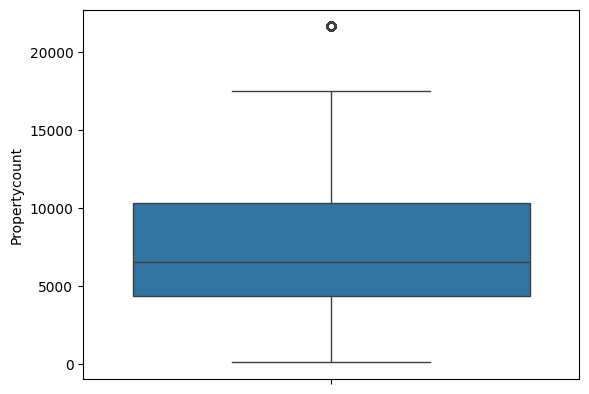

In [147]:
sns.boxplot(df["Propertycount"])

In [152]:
print ("outliers :" , df[(df['Propertycount'] > 19000)].count()/df.shape[0])
# not handling the outlier here

outliers : Rooms            0.021273
Type             0.021273
Price            0.021273
Method           0.021273
Distance         0.021273
Bedroom2         0.021273
Bathroom         0.021273
Car              0.021273
Landsize         0.021273
CouncilArea      0.021273
Regionname       0.021273
Propertycount    0.021273
Year             0.021273
Month            0.021273
Day              0.021273
dtype: float64


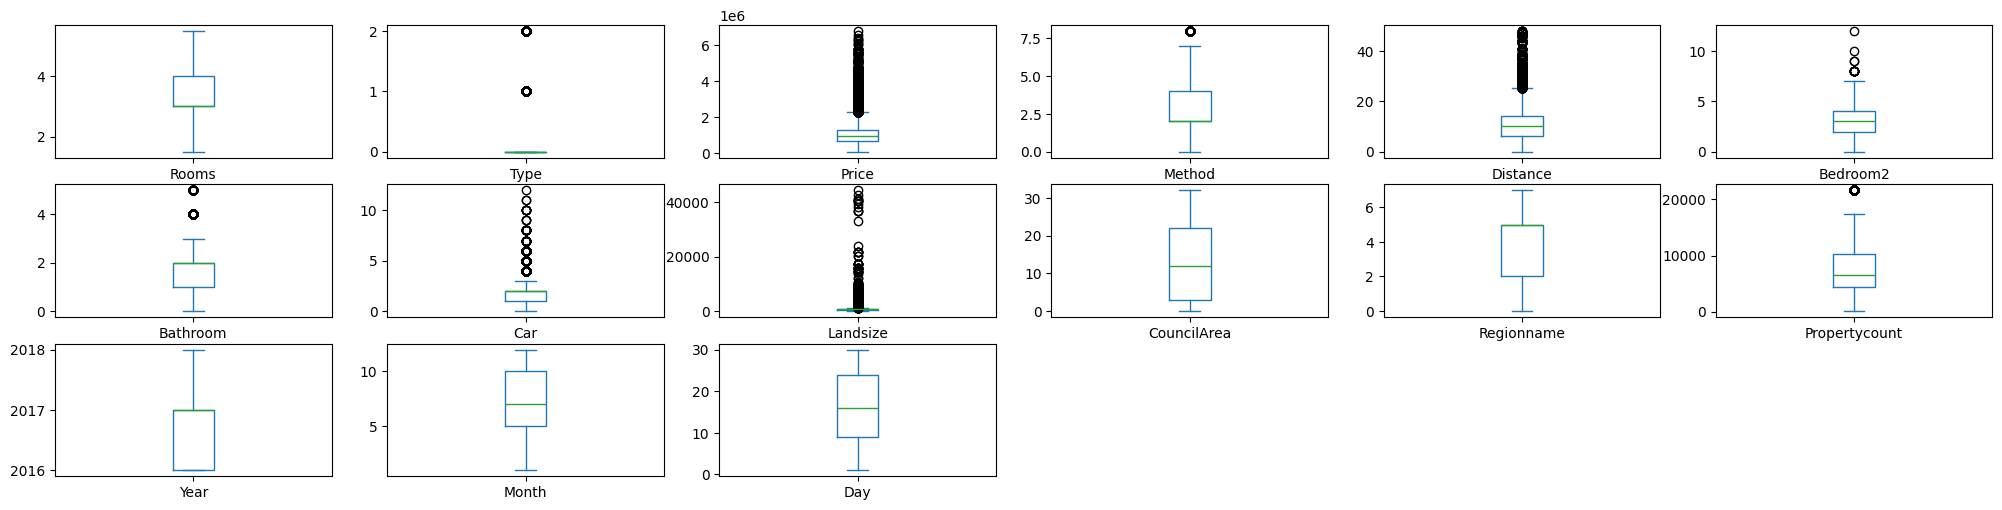

In [153]:
df.plot(kind = "box" , subplots = True , figsize = (25,10) , layout = (5,6))
plt.show()

# scaling

- we are going to make scale for the land size and the property count

In [154]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [155]:
df[['Landsize']] = sc.fit_transform(df[['Landsize']])
df[['Propertycount']] = sc.fit_transform(df[['Propertycount']])

C:\Users\w\AppData\Local\Temp\ipykernel_13320\2123565232.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['Landsize']] = sc.fit_transform(df[['Landsize']])
C:\Users\w\AppData\Local\Temp\ipykernel_13320\2123565232.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['Propertycount']] = sc.fit_transform(df[['Propertycount']])


In [156]:
df.head()

,Rooms,Type,Price,Method,Distance,Bedroom2,Bathroom,Car,Landsize,CouncilArea,Regionname,Propertycount,Year,Month,Day
0,2.0,0,2600000.0,6,2.5,2.0,1.0,1.0,-0.413315,31,2,-0.80535,2016,9,3
1,2.0,0,1480000.0,2,2.5,2.0,1.0,1.0,-0.349898,31,2,-0.80535,2016,12,3
2,2.0,0,1035000.0,2,2.5,2.0,1.0,0.0,-0.388282,31,2,-0.80535,2016,2,4
3,3.0,2,650000.0,7,2.5,3.0,2.0,1.0,-0.457540,31,2,-0.80535,2016,2,4
4,3.0,0,1465000.0,5,2.5,3.0,2.0,0.0,-0.406639,31,2,-0.80535,2017,3,4


# train test split

In [157]:
x = df.drop("Price" , axis =1)
y=df["Price"]

In [158]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y , test_size= 0.25 , random_state= 555)


In [159]:
x.shape

(26607, 14)

In [160]:
y.shape

(26607,)

In [161]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [162]:
lr.fit(x_train,y_train)
print("the train score")
print(lr.score(x_train,y_train))
print("the test score")
print(lr.score(x_test,y_test))

the train score
0.2734173344553562
the test score
0.2628109697179868


In [163]:
lr.intercept_

-74087751.08518611

In [165]:
y_pred=lr.predict(x_test)

In [166]:
pred = pd.DataFrame({"y_test" : y_test , "y_pred" : y_pred})
pred.head(20)

,y_test,y_pred
32103,6.000000e+05,1.063869e+06
10928,1.307500e+06,1.436570e+06
17352,1.381000e+06,1.411935e+06
29545,7.000000e+05,9.513312e+05
2136,9.140000e+05,1.104013e+06
19417,7.000000e+05,5.364263e+05
22464,1.573000e+06,1.249279e+06
11263,1.220000e+06,1.096406e+06
17855,1.190000e+06,1.624104e+06
21946,9.860000e+05,1.255597e+06


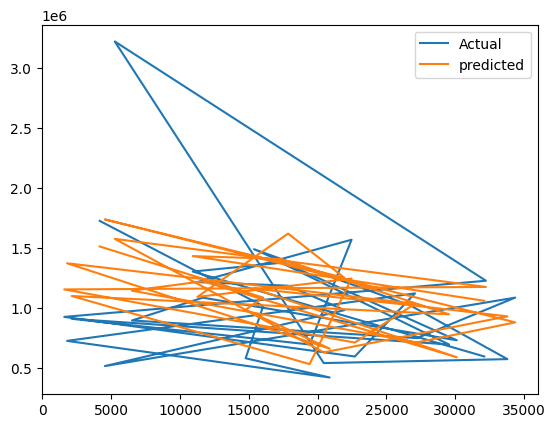

In [171]:
plt.plot(pred[:30])
plt.legend(["Actual" , "predicted"])

In [168]:
from sklearn.metrics import r2_score , mean_absolute_error , mean_absolute_percentage_error , mean_squared_error

In [169]:
r2=r2_score(y_test,y_pred)
r2

0.2628109697179868

In [172]:
mae= mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
mape=mean_absolute_percentage_error(y_test,y_pred)

In [175]:
print(mae)
print(mse)
print(mape)

374676.243003283
311315760293.9849
0.3856399246642711


In [176]:
from sklearn.linear_model import Lasso

In [182]:
la=Lasso(alpha=0.3)
la.fit(x_train,y_train)
print(la.score(x_train,y_train))
print(la.score(x_test,y_test))

0.2734173344529597
0.2628109511943266


In [187]:
y_pred=la.predict(x_test)

In [188]:
r2=r2_score(y_test,y_pred)
r2

0.2628109511943266

In [189]:
mae= mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
mape=mean_absolute_percentage_error(y_test,y_pred)

In [190]:
print(mae)
print(mse)
print(mape)

374676.22908105893
311315768116.54755
0.38563995902578435


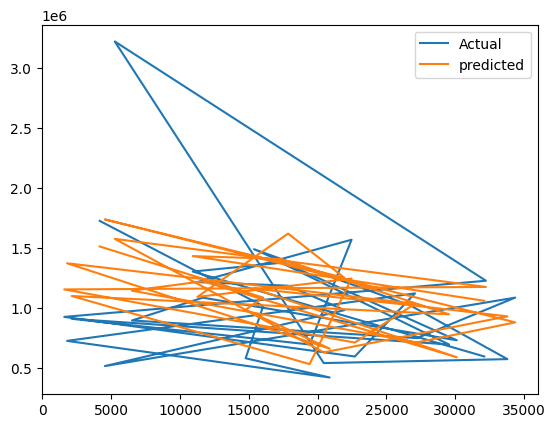

In [191]:
plt.plot(pred[:30])
plt.legend(["Actual" , "predicted"])